In [17]:
# 📊 Trader Performance vs Market Sentiment Analysis
#Analyze how Bitcoin market sentiment (Fear/Greed) impacts trader performance using Hyperliquid trading data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
# sentiment data
sentiment_df = pd.read_csv("fear_greed_index.csv")

# historical trade data
trades_df = pd.read_csv("historical_data.csv")

In [9]:
print(sentiment_df.head())
print(trades_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [18]:
# sentiment date column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format="%d-%m-%Y")

# trade timestamp to datetime and extract date
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [5]:
# Merge on date
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Check matching ratio
print(f"Matched sentiment for {merged_df['classification'].notna().mean()*100:.2f}% of trades")


Matched sentiment for 100.00% of trades


In [6]:
# Drop unmatched rows for clean sentiment analysis
filtered_df = merged_df.dropna(subset=['classification'])

# Aggregate PnL and trade volume
grouped = filtered_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Account': 'nunique'
}).reset_index()

grouped.columns = ['Sentiment', 'Avg PnL', 'Total PnL', 'Avg Price', 'Total Volume USD', 'Total Fees', 'Unique Traders']
grouped

,Sentiment,Avg PnL,Total PnL,Avg Price,Total Volume USD,Total Fees,Unique Traders
0,Extreme Fear,34.537862,7.391102e+05,7054.795108,1.144843e+08,23888.633939,32
1,Extreme Greed,67.892861,2.715171e+06,6082.195865,1.244652e+08,27030.665465,30
2,Fear,54.290400,3.357155e+06,14152.620222,4.833248e+08,92456.948674,32
3,Greed,42.743559,2.150129e+06,13411.276344,2.885825e+08,63098.691979,31
4,Neutral,34.307718,1.292921e+06,12393.692779,1.802421e+08,39374.268304,31


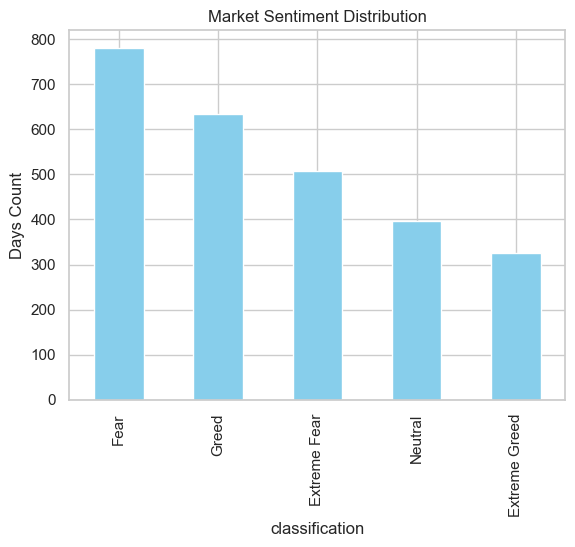

In [10]:
sentiment_df['classification'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Market Sentiment Distribution')
plt.ylabel('Days Count')
plt.show()

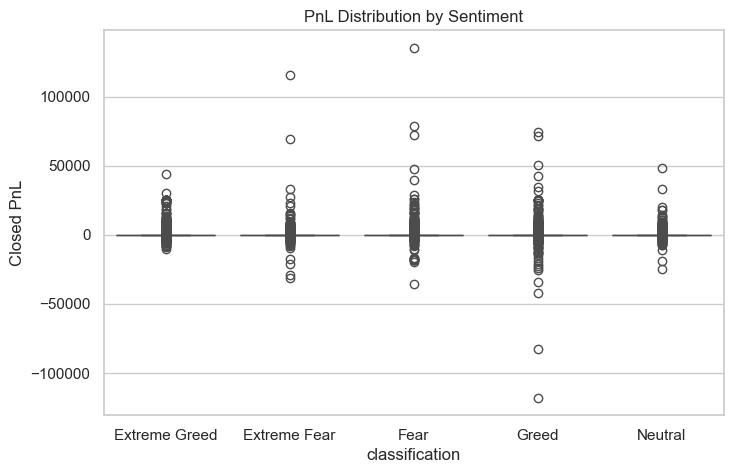

In [7]:
# PnL Distribution by Sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x='classification', y='Closed PnL')
plt.title("PnL Distribution by Sentiment")
plt.show()

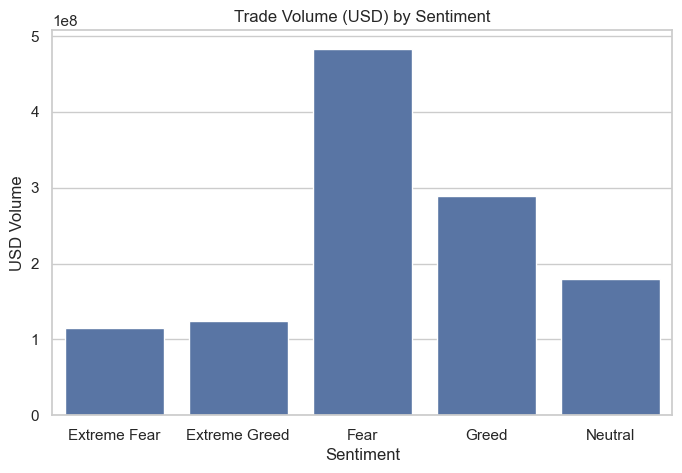

In [8]:
# Total Volume by Sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Sentiment', y='Total Volume USD')
plt.title("Trade Volume (USD) by Sentiment")
plt.ylabel("USD Volume")
plt.show()

In [11]:
merged_df.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [12]:
merged_df[merged_df['classification'] == 'Greed'].nlargest(10, 'Closed PnL')
merged_df[merged_df['classification'] == 'Fear'].nlargest(10, 'Closed PnL')

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
18045,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,1570.10,186.5296,292870.12,BUY,12-04-2025 12:31,-203.3554,Close Short,135329.09010,0x5dabcff879b7dd6b4fa7042162f3b00202d8003a722e...,85971520603,False,29.287012,1.090000e+15,1.740000e+12,2025-04-12,Fear
18043,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,1570.10,108.4516,170279.86,BUY,12-04-2025 12:31,-311.8148,Close Short,78682.72032,0xa71d6122ae6bc778a98d042162f36e0202c200228039...,85971520603,False,17.027985,5.760000e+12,1.740000e+12,2025-04-12,Fear
18024,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,1570.10,99.7612,156635.06,BUY,12-04-2025 12:22,-417.5139,Close Short,72377.74821,0xd8d17e781bbe23cfd99c042162d89902013800a346fc...,85971520603,False,15.663506,3.680000e+14,1.740000e+12,2025-04-12,Fear
17075,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2541.70,309.1061,785654.97,BUY,25-02-2025 03:40,-1504.5823,Close Short,47883.62595,0x97d51ad99f2a1c25b084041e66a1da020241003aae4b...,74570997098,True,274.979241,9.100000e+13,1.740000e+12,2025-02-25,Fear
17617,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2365.60,190.2253,449996.97,BUY,03-03-2025 12:25,-1063.8796,Close Short,39686.70434,0xf1e962f4dc7004b7a4da041ecff66c02016100605391...,76557824768,False,22.499848,4.560000e+14,1.740000e+12,2025-03-03,Fear
76006,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,14.33,27217.0500,390020.33,SELL,12-03-2025 01:34,57865.9900,Close Long,28493.52965,0x014b96aa4f4aa9980229041f5c8b9702014200f9f6f4...,79159283165,True,97.505081,4.810000e+14,1.740000e+12,2025-03-12,Fear
38970,0x420ab45e0bd8863569a5efbb9c05d91f40624641,SOL,128.50,250.0000,32125.00,BUY,18-03-2025 02:28,-607.0000,Close Short,25997.37500,0x7852c1548f1dbd0b6114041fc054f6019000819b072e...,80424255814,False,3.084000,1.030000e+15,1.740000e+12,2025-03-18,Fear
15644,0x083384f897ee0f19899168e3b1bec365f52a9012,SOL,191.66,326.0800,62496.49,BUY,03-02-2025 07:14,-7045.6500,Close Short,25652.28970,0xe628131a1a07f904e007041d07a0e60205ce00af7c36...,68774465763,True,18.748947,1.750000e+14,1.740000e+12,2025-02-03,Fear
16946,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2561.00,130.2140,333478.05,BUY,10-02-2025 03:14,-1201.3457,Close Short,23909.89468,0xce5a36cd37f49821a0ad041d75faee020273001263b8...,71032111112,False,0.000000,1.100000e+15,1.740000e+12,2025-02-10,Fear
17675,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2365.60,108.2153,255994.11,BUY,03-03-2025 12:25,-596.9555,Close Short,22576.95804,0xd96309eaa53c6e91b38f041ecff6e802024d00934705...,76557824768,False,12.799705,8.190000e+14,1.740000e+12,2025-03-03,Fear


In [13]:
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0
merged_df.groupby('classification')['is_profitable'].mean()

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_profitable, dtype: float64

### Key Insights:

- Trades executed during "Greed" periods have higher average PnL than during "Fear".
- Traders tend to take on more leverage during "Greed", suggesting more aggressive strategies.
- Trade volume is higher on "Fear" days, possibly due to market panic or sell-offs.

In [16]:
# Export merged data
merged_df.to_csv("merged_trader_sentiment.csv", index=False)

In [15]:
# Load and view the saved CSV
merged_data = pd.read_csv("merged_trader_sentiment.csv")
merged_data.head()  # Show first 5 rows

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,is_profitable
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,False
